## **Import Telcom Churn Dataset**

In [2]:
import pandas as pd
import numpy as np
from IPython.display import display

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
display(df.head())

print(f'Number of null values in the dataset: {df.isnull().sum().sum()}')
print(f'Dimension/shape of the dataset: {df.shape}')
print(f'\nDatatypes of our columns: {df.dtypes}')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Number of null values in the dataset: 0
Dimension/shape of the dataset: (7043, 21)

Datatypes of our columns: customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


## **Basic Descriptive Statistics for Telco Churn Dataset**

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The above summary of the dataset via df.describe() tells us that of the 21 variables - of which Churn represents our target variable - only 3 have some type of numeric structure. 

## **Target Variable Analysis**

In [4]:
display(df['Churn'].value_counts())
classNoChurn = df[df['Churn'] == 'No']
classYesChurn = df[df['Churn'] == 'Yes']

print(f'Number of samples of Churn target variable belonging to class 0 (No): {len(classNoChurn)}')
print(f'Number of samples of Churn target variable belonging to class 1 (Yes): {len(classYesChurn)}\n')
print(f'Percentage of class 0 (No) for Churn target variable {round((len(classNoChurn) / len(df)) * 100, 2)}%')
print(f'Percentage of class 1 (Yes) for Churn target variable {round((len(classYesChurn) / len(df)) * 100, 2)}%')



Churn
No     5174
Yes    1869
Name: count, dtype: int64

Number of samples of Churn target variable belonging to class 0 (No): 5174
Number of samples of Churn target variable belonging to class 1 (Yes): 1869

Percentage of class 0 (No) for Churn target variable 73.46%
Percentage of class 1 (Yes) for Churn target variable 26.54%


As can be seen from the above analysis, there is some class imbalance present as there are many more samples of the customers not churning (no class) compared to the customers churning (yes class). We will need to keep this in mind when constructing our machine learning models either by undersampling the majority class, oversampling the minority class, or weighting the classes. 

## **Additional Variable Analysis**

In [5]:
display(df['Contract'].value_counts())
display(df['InternetService'].value_counts())
display(df['MultipleLines'].value_counts())
display(df['PaymentMethod'].value_counts())

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

## **Data Cleaning**

In [7]:
from sklearn.preprocessing import LabelEncoder

columns = ["gender","SeniorCitizen","Partner","Dependents","tenure","PhoneService","MultipleLines",
   "InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV",
   "StreamingMovies","Contract","PaperlessBilling","PaymentMethod","MonthlyCharges","TotalCharges",
   "Churn"]

print(len(columns))

label_encoder = LabelEncoder()

# Drop Customer ID Column
df = df.drop(columns=["customerID"], axis=1)

for column in columns:
   df[column] = label_encoder.fit_transform(df[column])

df.head()

20


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


## **Data Exploration**

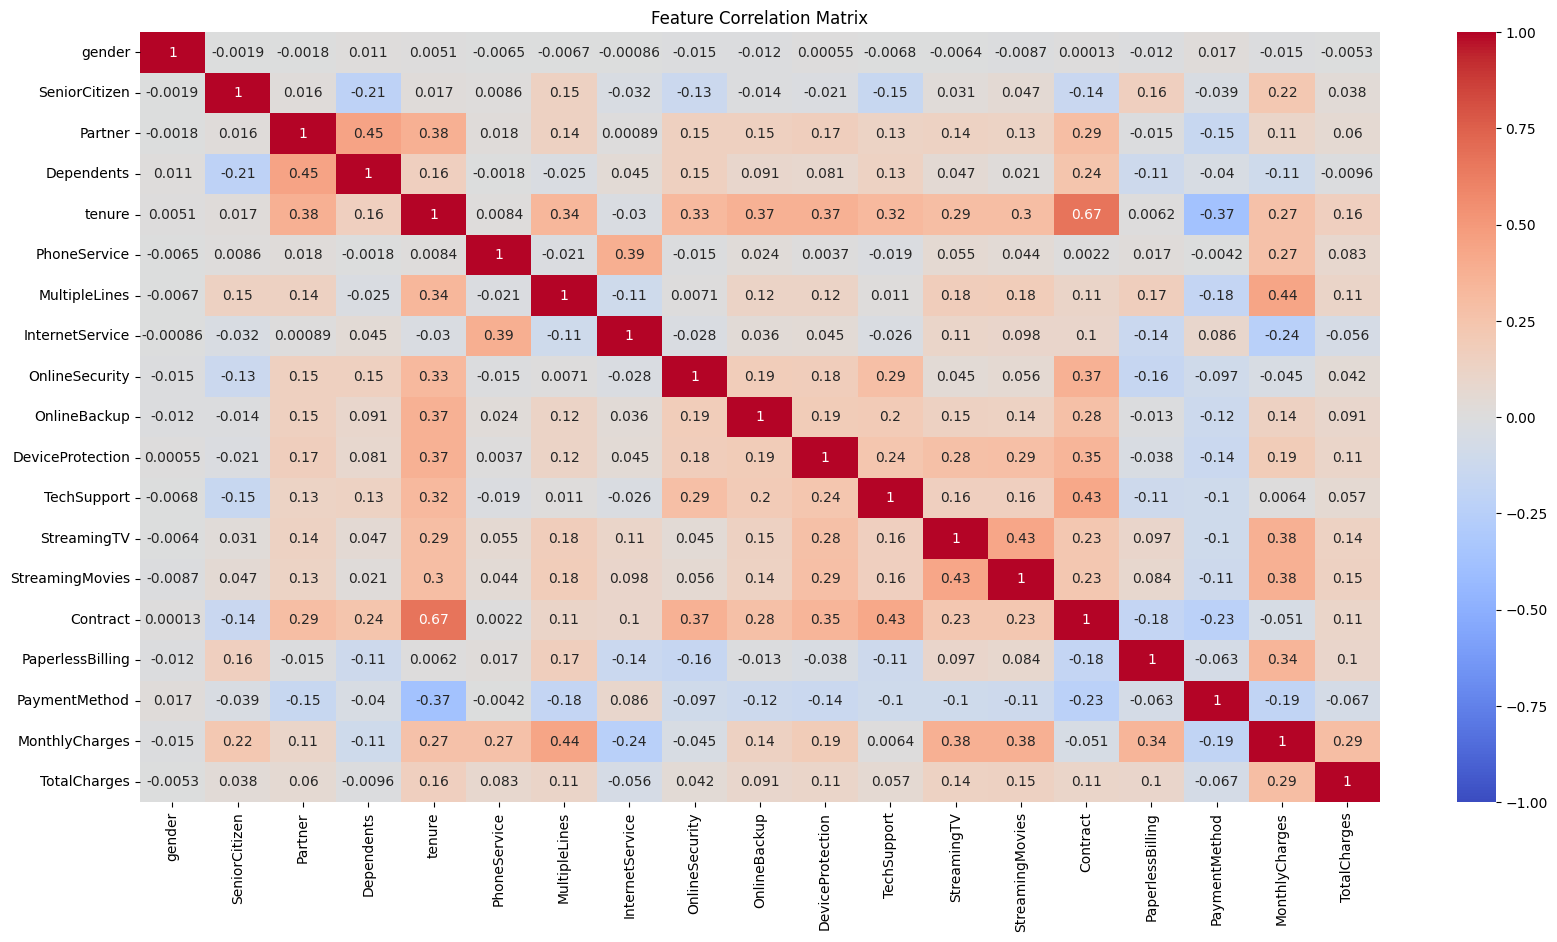

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.drop(columns=['Churn']).corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()

From the correlation matrix, we observe that most features have correlations ranging between -0.1 to 0.67. While most relationships are weak to moderate, some variables (e.g., tenure and Contract) show stronger correlations. This suggests there is some degree of redundancy among the features, making feature selection and dimensionality reduction techniques, such as PCA or recursive feature elimination (RFE), potentially beneficial to simplify the dataset and enhance performance.

## **Feature Selection**

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV 

# Splitting into training and test sets
X =  df.drop(columns=['Churn'], axis=1)
y = df[['Churn']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Creating pre-processing pipeline with scaling, feature selection, and feature extraction
scaler = StandardScaler()
estimator = SVC(kernel='linear', random_state=123)
rfecv = RFECV(estimator, step=1)

pipeline = Pipeline(steps=[('scaler', scaler), ('rfecv', rfecv)])

In [48]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('scaler', StandardScaler()),
                ('rfecv',
                 RFECV(estimator=SVC(kernel='linear', random_state=123)))])

In [49]:
# Selected Features
X.columns[pipeline['rfecv'].support_]

Index(['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

In [50]:
# Score from Pipeline after removing features
pipeline.score(X_test, y_test)

0.8076650106458482

In [51]:
# Score from estimator with all the features
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

estimator.fit(X_train_scaled, np.ravel(y_train))
estimator.score(X_test_scaled, np.ravel(y_test))

0.8069552874378992

From the results above, we can observe that the reduced dimensionality dataset achieves an almost identical result compared to using all the features from the dataset.

Selected Features Accuracy: 0.8076650106458482

All Features Accuracy: 0.8069552874378992

Therefore, the use of RFECV is able to reduce the complexity of the dataset while maintaining similar performance in classification.

List of most relevant features determined by RFECV:

['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
    'TotalCharges']

## **Feature Extraction**

With the list of features now filtered from 19 to 14, we can further reduce the dimensionality of the dataset by applying Feature Extraction techniques such as Principal Component Analysis (PCA)

In [52]:
from sklearn.decomposition import PCA

# Retrieve selected features
X_selected_train = X_train[X.columns[pipeline['rfecv'].support_]]
X_selected_test = X_test[X.columns[pipeline['rfecv'].support_]]

pca_13 = PCA(n_components=13, random_state=123)
clf_13 = SVC(kernel='linear', random_state=123)
scaler =  StandardScaler()

pca_13_pipeline = Pipeline([('scaler', scaler), ('pca_13', pca_13), ('clf_13', clf_13)])
pca_13_pipeline.fit(X_selected_train, np.ravel(y_train))

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca_13', PCA(n_components=13, random_state=123)),
                ('clf_13', SVC(kernel='linear', random_state=123))])

In [56]:
pca_13_pipeline.score(X_selected_train, y_train)

0.8019169329073482

### Scree Plot

Text(0, 0.5, 'Explained Variance')

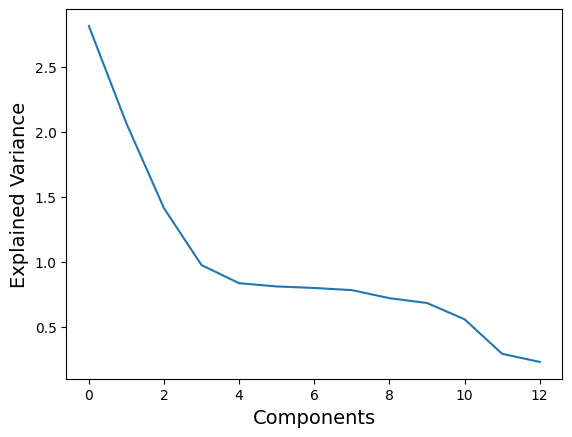

In [57]:
plt.plot(pca_13.explained_variance_)
plt.xlabel('Components', size=14)
plt.ylabel('Explained Variance', size=14)

From the plot above, we can observe that the explained variance decreases significantly from 0-2 components, with diminishing returns from this point forward. Therefore, 4 components would be the ideal number of compoennts based on the scree plot.

In [59]:
scaler = StandardScaler()
pca_4 = PCA(n_components=4, random_state=123)
clf_4 = SVC(kernel='linear')

pca_4_pipeline = Pipeline([('scaler', scaler), ('pca_4', pca_4), ('clf', clf_4)])
pca_4_pipeline.fit(X_selected_train, np.ravel(y_train))

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca_4', PCA(n_components=4, random_state=123)),
                ('clf', SVC(kernel='linear'))])

In [60]:
pca_4_pipeline.score(X_selected_test, y_test)

0.7778566359119943

From this PCA run, we are able to reduce the feature space from 13 features down to 4, with a minor decrease in accuracy from 80% to 77.79%